In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# working with time series

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7,freq="D")

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [3]:
google=pd.read_csv("./stock_data/google.csv")
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [4]:
google.set_index("Date",inplace=True)
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [5]:
google.Date=pd.to_datetime(google.Date)
google.info()

AttributeError: 'DataFrame' object has no attribute 'Date'

In [ ]:
data = pd.read_csv('./stock_data/nyse.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date=pd.to_datetime(data.date)

# Set date column as index
data.set_index("date",inplace=True)

# Inspect data 
print(data.info())

# Plot data
#El argumento subplots=True en la función data.plot() indica que quieres trazar cada columna de datos en su propio subplot independiente. Esto significa que si tienes múltiples columnas en tu DataFrame data, cada una de ellas se representará en un subplot separado dentro de la misma figura."""
data.plot(subplots=True)
#plt.tight_layout(), estás ajustando automáticamente los subplots para que se ajusten bien en la figura, evitando superposiciones de etiquetas y otros elementos
plt.tight_layout()
plt.show()



### compare the performance for three years of Yahoo stock prices.

In [6]:
yahoo = pd.read_csv('./stock_data/yahoo.csv')
yahoo.date=pd.to_datetime(yahoo.date)
#En el contexto del método set_index(), cuando inplace=True, la modificación se realizará en el DataFrame original yahoo. Es decir, el DataFrame yahoo tendrá su índice cambiado por la columna especificada (date, en este caso) y no se devolverá un nuevo DataFrame.
yahoo.set_index("date",inplace=True)
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


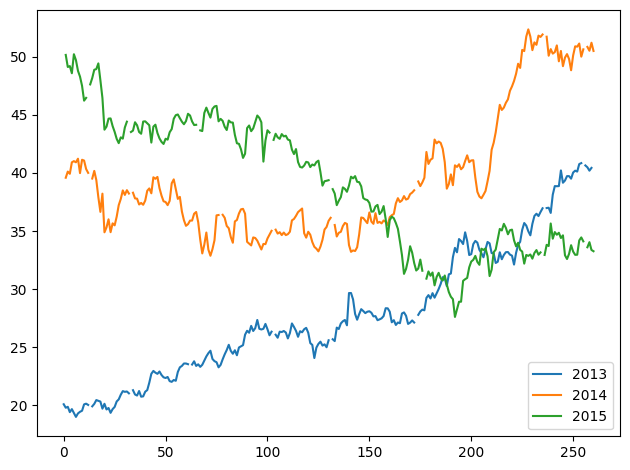

In [7]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ["2013","2014","2015"]:
    price_per_year = yahoo.loc[yahoo.index.year==int(year), ["price"]].reset_index(drop=True)
    price_per_year.rename(columns={"price": year}, inplace=True)#con esta linea cambiamos el nombre de la columna price por el año
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices

prices.plot()
plt.tight_layout()
plt.show()


### Set and change time series frequency
 you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [8]:
co = pd.read_csv('./air_quality_data/co_cities.csv',parse_dates=["date"])#parse dates cambia el tipo de dato de dates 
co.set_index("date",inplace=True)
co.asfreq("M").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2005-01-31 to 2010-12-31
Freq: M
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      68 non-null     float64
 1   Los Angeles  68 non-null     float64
 2   New York     68 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 123.9 KB
None


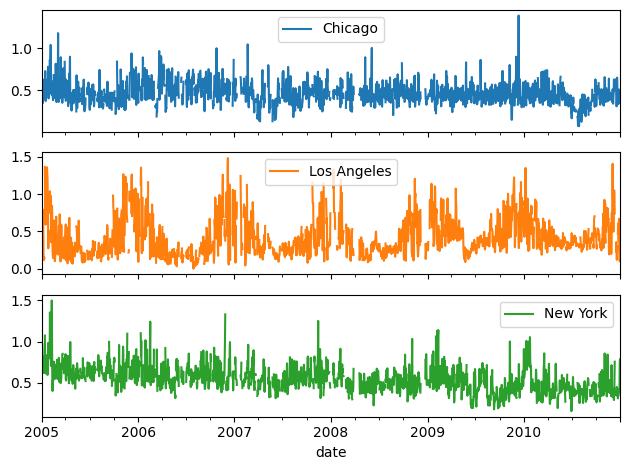

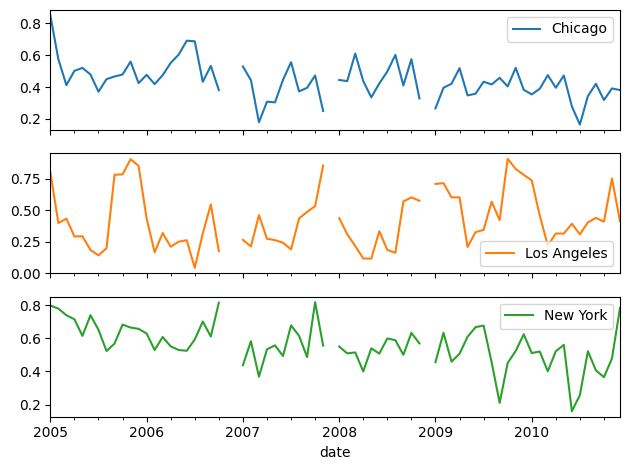

In [9]:
# Inspect data
print(co.info())
# Set the frequency to calendar daily
co = co.asfreq("D")
# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()
# Set frequency to monthly
co = co.asfreq("M")
# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()

### lag,changes and returns

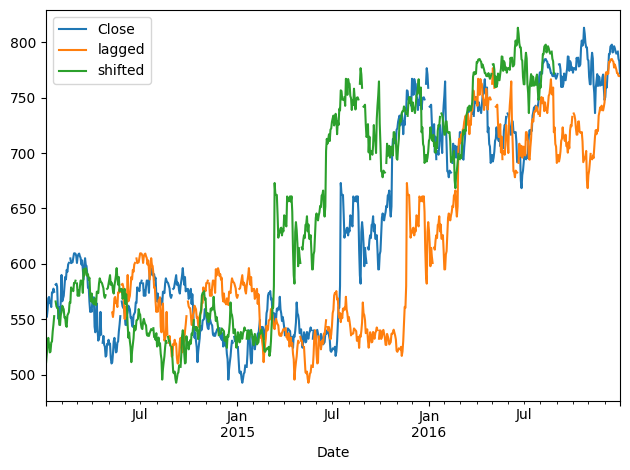

In [10]:
# Import data here
google = pd.read_csv("./stock_data/google.csv",parse_dates=["Date"],index_col="Date")

# Set data frequency to business daily
google = google.asfreq("B")

# Create 'lagged' and 'shifted'
google['lagged'] = google["Close"].shift(periods=90)
google['shifted'] = google["Close"].shift(periods=-90)

# Plot the google price series
google.plot()
plt.tight_layout()
plt.show()


###  calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [11]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo["price"].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo["price"].sub(yahoo['shifted_30'])

# Get the 30-day price difference
yahoo['diff_30'] = yahoo["price"].diff(periods=30)

# Inspect the last five rows of price
print(yahoo["price"].tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())


date
2015-12-25      NaN
2015-12-28    33.60
2015-12-29    34.04
2015-12-30    33.37
2015-12-31    33.26
Name: price, dtype: float64
0.0    703
Name: count, dtype: int64


### Plotting multi-period returns
calculate returns for various calendar day periods, and plot the result to compare the different patterns.

C:\Users\kevin\AppData\Local\Temp\ipykernel_548\3742347559.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['daily_return'] = google["Close"].pct_change(periods=1).mul(100)
C:\Users\kevin\AppData\Local\Temp\ipykernel_548\3742347559.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['monthly_return'] =  google["Close"].pct_change(periods=30).mul(100)
C:\Users\kevin\AppData\Local\Temp\ipykernel_548\3742347559.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior

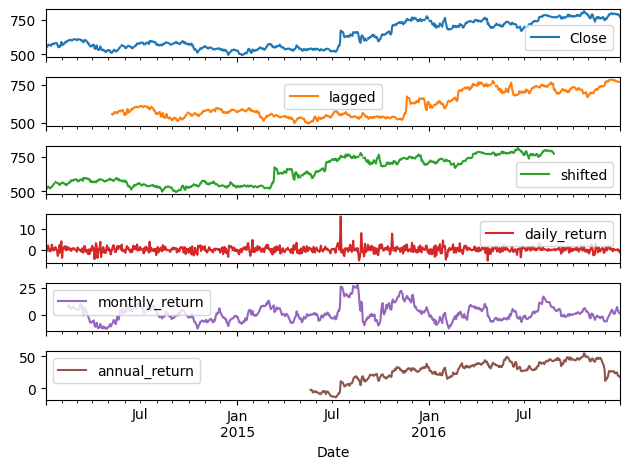

In [12]:
# Create daily_return
google['daily_return'] = google["Close"].pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] =  google["Close"].pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] =  google["Close"].pct_change(periods=360).mul(100)

# Plot the result

google .plot(subplots=True)
plt.tight_layout()
plt.show()

# Basic Time Series Metrics & Resamplinggg

## compare time series growth rates

**Compare the performance of several asset classes**
You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


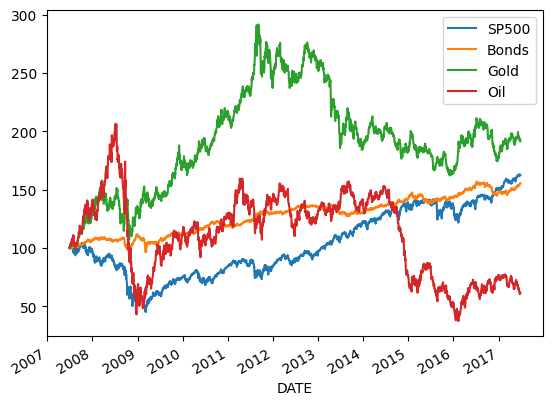

In [3]:
# Import data here
prices = pd.read_csv('./stock_data/asset_classes.csv',parse_dates=["DATE"],index_col="DATE")

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = (prices/first_prices)*100

# Plot normalize
normalized.plot()
plt.show()

**Comparing stock prices with a benchmark**

You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

Company	Stock Ticker
Johnson & Johnson	JNJ
Exxon Mobil	XOM
JP Morgan Chase	JPM

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


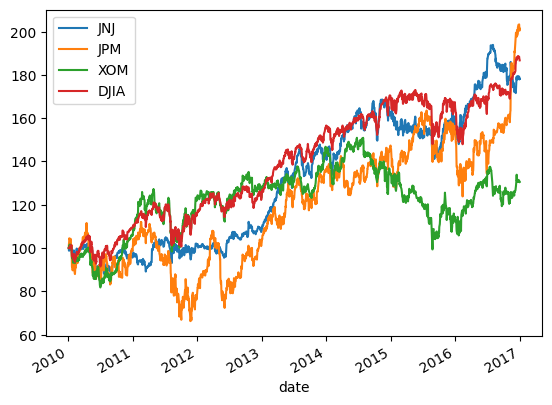

In [4]:
# Import stock prices and index here
stocks = pd.read_csv("./stock_data/nyse.csv",parse_dates=["date"],index_col="date")
dow_jones = pd.read_csv("./stock_data/dow_jones.csv",parse_dates=["date"],index_col="date")

# Concatenate data and inspect result here
data = pd.concat([stocks,dow_jones],axis=1)
print(data.info())

# Normalize and plot your data here

# Select first prices
first_prices = data.iloc[0]


# Create normalized
data.div(first_prices).mul(100).plot()#otra manera directamente de normalizar los datos 

plt.show()

# Window Functions: Rolling & Expanding Metrics # 

# Building a value-weighted index